# Domestic Load Research Programme Customer Class Inference

**Setup instructions**

1. Install libpgm with `pip install libpgm`
2. Execute `2to3 -w /home/user/anaconda3/lib/python3.5/site-packages/utils/bntextutils.py` from the command prompt

## Support functions for BN construction and inference

In [2]:
#load support functions
from classmod.bncore import inferCustomerClasses, classes2csv
from classmod.bnevidence import generateEvidenceExp1, saveEvidence
import classmod.bnplot as bnplot
from math import ceil

#initiate offline plotting for plotly
import plotly.offline as offline
import plotly.graph_objs as go
from plotly import tools
offline.init_notebook_mode(connected=True)

from IPython.core.display import Image

#set data directory that contains evidence
model = 'exp1_bn' #text file containing model
evidence_dir = 'exp1' #directory containing evidence/observations

## BN Graph Visualisation

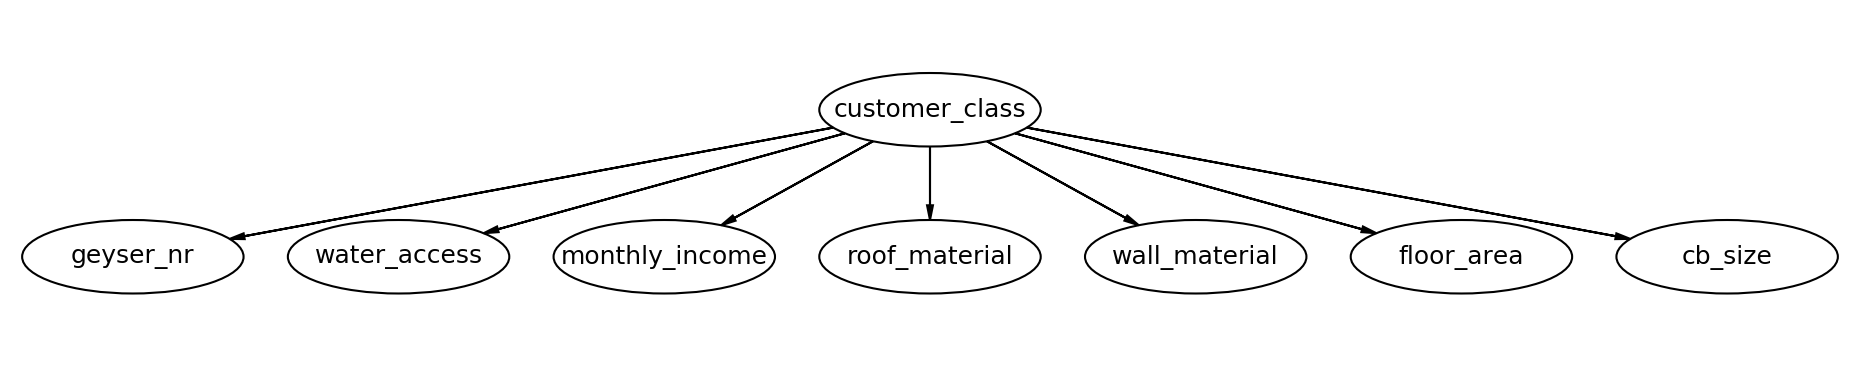

In [3]:
bnplot.graphViz(model)
Image('images/experimental_model'+model+'.png')

## BN Evidence

### Generate evidence set for the customer class model.

In [10]:
for year in range(2000, 2015):
    evidence, year = generateEvidenceExp1(year)
    saveEvidence(evidence, year, experiment_dir = 'exp1')

Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2000.txt
Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2001.txt
Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2002.txt
Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2003.txt
Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2004.txt
Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2005.txt
Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2006.txt
Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2007.txt
Successfully saved to /Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/evidence/exp1/bn_evidence_2008.txt
Successfully saved to /Users/SaintlyV

## BN Inference

### Generate probability distribution over customer_class variable | evidence

In [8]:
cc12, bn12 = inferCustomerClasses(model, evidence_dir, 2000)
print(cc12.head())
len(cc12)

                 rural       village  informal_settlement  township  \
AnswerID                                                              
719       2.212808e-02  1.138734e-01         4.882906e-01  0.375701   
890       2.297486e-14  2.801671e-11         3.097258e-08  0.872455   
58        2.964118e-16  3.614595e-13         3.122063e-11  0.001372   
578       3.463280e-07  1.520387e-02         5.238838e-01  0.460863   
514                NaN           NaN                  NaN       NaN   

          urban_res_7  urban_townhouse_7-8  urban_res_8-9  \
AnswerID                                                    
719          0.000004             0.000003   1.093251e-12   
890          0.047807             0.079160   1.946929e-08   
58           0.479441             0.501209   1.294724e-02   
578          0.000026             0.000022   9.222279e-07   
514               NaN                  NaN            NaN   

          urban_townhouse_9-10  urban_estate_10+  
AnswerID               

988

### Visualise inferred customer classes

In [5]:
bnplot.plotClassDist(model, evidence_dir, 2011)

In [7]:
bnplot.plotClassYearRange(2011, 2014, model, evidence_dir)

## Save classes to csv file

In [14]:
for year in range(2000, 2015):
    print(year)
    df, bn = inferCustomerClasses(model, evidence_dir, year)
    filename = 'classes_' + str(year) + '.csv'
    classes2csv(df, filename, out_dir = evidence_dir)

2000
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2000.csv
2001
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2001.csv
2002
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2002.csv
2003
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2003.csv
2004
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2004.csv
2005
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2005.csv
2006
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2006.csv
2007
Could not save file.
2008
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2008.csv
2009
Successfully saved to/Users/SaintlyVi/Documents/MScMac/DLR_DB/classmod/out/exp1/classes_2009.csv
2010
Successfully saved to/Users/SaintlyVi/Documents/MSc